# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
df_a=pd.read_csv('5_a.csv')

In [3]:
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [4]:
# write your code here for task A

## Converting <0.5 to 0
## Number of actual data point which are 0
df_a[df_a["y"] == 0].count() 

y        100
proba    100
dtype: int64

In [5]:
## No of actual data points which are 1
df_a[df_a["y"] == 1].count()

y        10000
proba    10000
dtype: int64

In [6]:
np_array = df_a.to_numpy()

In [7]:
sorted_data = np_array[np_array[:,1].argsort()[::-1]]

In [8]:
sorted_data

array([[1.        , 0.89996535],
       [1.        , 0.89982831],
       [1.        , 0.89982485],
       ...,
       [1.        , 0.50005801],
       [1.        , 0.50004734],
       [1.        , 0.50001859]])

In [9]:
def accuracy(cf_matrix):
    tp = cf_matrix[1][1]
    tn = cf_matrix[0][0]
    fp = cf_matrix[0][1]
    fn = cf_matrix[1][0]
    
    return (tp+tn)/(tp+tn+fp+fn)

def confusion_matrix(np_arr,theta):
    # Assuming that true and predicted labels are in integers 
    x = 2# No of colums i.e no of prediction category
    y = 2# No of rows i.e no of true labels
    d = max(x,y)
    matrix = [[0 for j in range(d)] for i in range(d)]
    for i in range(np_arr.shape[0]):
        y,proba = np_arr[i]
        if proba>theta:
            matrix[int(y)][1]+=1
        else:
            matrix[int(y)][0]+=1
    return matrix

def f1_score(cf_matrix):
    tp = cf_matrix[1][1]
    tn = cf_matrix[0][0]
    fp = cf_matrix[0][1]
    fn = cf_matrix[1][0]
    #print(tp,tn,fp,fn)
    precision = tp/(tp+fp) # how many correctly predicted true out of all true prediction
    recall  = tp/(tp+fn)  # how many correctly predicted true out of all true groud truth
    #print(precision,recall)
    F1_score = (2*precision*recall)/(precision+recall) # Harmonic mean of precison and recall 
    return F1_score

def tpr_fpr(cf_matrix):
    tp = cf_matrix[1][1]
    tn = cf_matrix[0][0]
    fp = cf_matrix[0][1]
    fn = cf_matrix[1][0]
    #print(tp,tn,fp,fn)
    fpr = fp/(tn+fp) # how many correctly predicted true out of all true prediction
    recall  = tp/(tp+fn)  # how many correctly predicted true out of all true groud truth
    return recall,fpr

cf_matrix = confusion_matrix(sorted_data,0.5)
#print(cf_matrix)
print(f" The F1 Score is {f1_score(cf_matrix)}")
print(f" The Accuracy score is {accuracy(cf_matrix)}")

 The F1 Score is 0.9950248756218906
 The Accuracy score is 0.9900990099009901


In [10]:
from tqdm import tqdm
unique_th = np.unique(sorted_data[:,1])
cords = []
for i in tqdm(unique_th):
    tpr,fpr = tpr_fpr(confusion_matrix(sorted_data,i))
    cords.append([fpr,tpr])
    

100%|██████████████████████| 10100/10100 [02:19<00:00, 72.24it/s]


In [11]:
np_cords = np.array(cords)

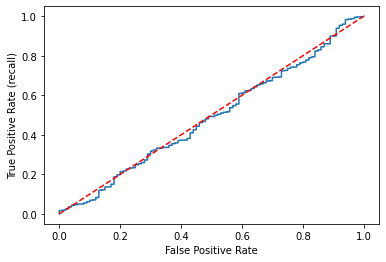

In [12]:
import matplotlib.pyplot as plt

plt.plot(np_cords[:,0],np_cords[:,1])
plt.plot(np.array([0,1]), linestyle = 'dashed',color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (recall)")
plt.show()

In [13]:
area = 0
x,y = cords[0]
for i in range(len(cords)):
    x1,y1 = cords[i]
    area += abs(x-x1)*(y+y1)/2
    x=x1
    y=y1
    

In [14]:
print(f"The area under the curve is {area}")

The area under the curve is 0.48829900000000015




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [15]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [16]:
# write your code here for task B
df_b[df_b["y"] == 0].count() 

y        10000
proba    10000
dtype: int64

In [17]:
df_b[df_b["y"] == 1].count() 

y        100
proba    100
dtype: int64

 The F1 Score is 0.2791878172588833
 The Accuracy score is 0.9718811881188119


100%|██████████████████████| 10100/10100 [02:13<00:00, 75.81it/s]


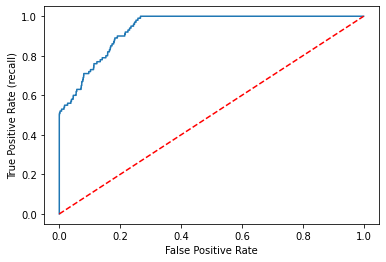

In [18]:
np_array_b = df_b.to_numpy()
sorted_data_b = np_array_b[np_array_b[:,1].argsort()[::-1]]
cf_matrix = confusion_matrix(sorted_data_b,0.5)
print(f" The F1 Score is {f1_score(cf_matrix)}")
print(f" The Accuracy score is {accuracy(cf_matrix)}")


unique_th = np.unique(sorted_data_b[:,1])
cords = []
for i in tqdm(unique_th):
    tpr,fpr = tpr_fpr(confusion_matrix(sorted_data_b,i))
    cords.append([fpr,tpr])
np_cords = np.array(cords)
plt.plot(np_cords[:,0],np_cords[:,1])
plt.plot(np.array([0,1]), linestyle = 'dashed',color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (recall)")
plt.show()

In [19]:
area = 0
x,y = cords[0]
for i in range(len(cords)):
    x1,y1 = cords[i]
    area += abs(x-x1)*(y+y1)/2
    x=x1
    y=y1
print(f"The area under the curve is {area}")

The area under the curve is 0.9376569999999876


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [20]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [21]:
 # write your code for task C
np_array_c = df_c.to_numpy()
sorted_data_c = np_array_c[np_array_c[:,1].argsort()[::-1]]
unique_th = np.unique(sorted_data_c[:,1])
# Lowest value of 500*fn + 100*fp
A = 500*len(unique_th)
best=0
for i in tqdm(np_array_c[:,1]):
    cf_matrix = confusion_matrix(sorted_data_c,i)
    new_A = 500*cf_matrix[1][0] + 100*cf_matrix[0][1]
    if new_A<=A:
        best = i
        A = new_A
print(f"Best Threshold is {best} and min value of metric A is {A}")

100%|███████████████████████| 2852/2852 [00:10<00:00, 272.69it/s]

Best Threshold is 0.2298716443615991 and min value of metric A is 141000



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [22]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [23]:
 # write your code for task 5d
np_array_d = df_d.to_numpy()

def residual(data):
    return data[:,1]-data[:,0]
def ss_res(data):
    e = residual(data)
    return np.sum(e**2)
def ss_total(data):
    y_mean = data[:,0].mean() # mean of actual labels
    return np.sum((data[:,0]-y_mean)**2)

def mean_squared(data):
    return ss_res(data)/len(data)

def r_squared(data):
    return 1 - (ss_res(data)/ss_total(data))
def MAPE(data):
    y_mean = np.mean(data[:,0])
    e = residual(data)
    return np.sum(np.absolute(e)/y_mean)/len(e)
print(f"Mean squared error {mean_squared(np_array_d)}")
print(f"R squared error {r_squared(np_array_d)}")
print(f"MAPE Error {MAPE(np_array_d)}")

Mean squared error 177.16569974554707
R squared error 0.9563582786990937
MAPE Error 0.12912029940096867
